In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import pickle

In [2]:
data=pd.read_csv('credit_train_data.csv')

In [3]:
data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,Credit_Score
0,0,0.272727,0.363636,0.060606,0.111111,0.067568,0.486842,0.081633,1.0,0.655087,1.0,0
1,1,0.272727,0.363636,0.060606,0.055556,0.047297,0.486842,0.081633,1.0,0.655087,1.0,0
2,2,0.272727,0.363636,0.060606,0.111111,0.067568,0.486842,0.081633,1.0,0.660050,1.0,0
3,3,0.272727,0.363636,0.060606,0.138889,0.047297,0.349781,0.081633,1.0,0.662531,1.0,0
4,4,0.272727,0.363636,0.060606,0.152778,0.047297,0.486842,0.081633,1.0,0.665012,1.0,0


In [4]:
data=data.drop('Unnamed: 0',axis=1)

In [5]:
## Splits the data in to dependend and independed variables

Y=data.iloc[:,-1]
X=data.iloc[:,:-1]

In [6]:
sc=StandardScaler()
x=sc.fit_transform(X)
x=pd.DataFrame(x)

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=121)

In [8]:
knn=KNeighborsClassifier()

In [9]:
## finding the best k value

mean_accu=np.zeros(20)

for i in range (1,21):
    knn=KNeighborsClassifier(n_neighbors=i).fit(X_train,Y_train)
    y_pred=knn.predict(X_train)
    mean_accu[i-1]=accuracy_score(Y_train,y_pred)
    
mean_accu

array([0.99809139, 0.87241984, 0.8665809 , 0.83747102, 0.82942657,
       0.81615111, 0.80769666, 0.79794153, 0.79022225, 0.78254538,
       0.77503817, 0.77085336, 0.76481649, 0.75988237, 0.75572584,
       0.75409998, 0.75203585, 0.74869932, 0.74783691, 0.74567381])

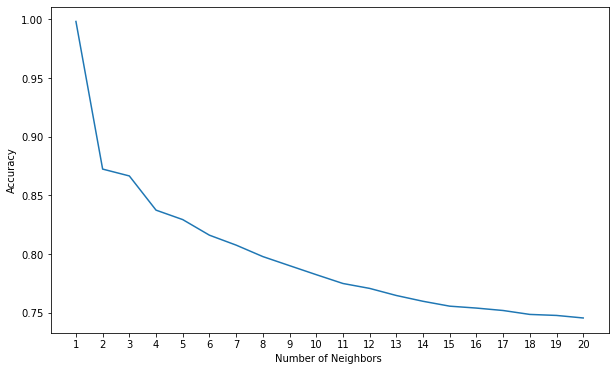

In [10]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_accu)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [11]:
grid_params = { 'n_neighbors' : [1,2,3,4,5,6,7,8],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [12]:
gs=GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=3,n_jobs=-1)

g_res=gs.fit(X_train,Y_train)
g_res.best_score_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


0.7629785804820998

In [13]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}

In [14]:
knn=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 8, weights= 'distance')

knn.fit(X_train,Y_train)
y_pred=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

print('Accuracy score of training data :',accuracy_score(Y_train,y_pred))
print('Accuracy score of test data :',accuracy_score(Y_test,y_pred_test))


Accuracy score of training data : 0.9981903523157836
Accuracy score of test data : 0.7797444017190681


In [16]:
pickle.dump(knn,open('model.pkl','wb'))